In [1]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#This part linkes the dataset in the drive to the google colab file
link = 'https://drive.google.com/file/d/1GEsalW5I7kD50HaBdUgUZSk1d3qBM1Z5/view?usp=sharing'
id = link.split('/')[-2]
downloaded = drive.CreateFile({'id' : id})
downloaded.GetContentFile('StockPrices.csv')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('stockprizes.csv')
df['Date']= pd.to_datetime(df['Date'])
df_close = df[['Date', 'Index', 'Close']] 
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591628 entries, 0 to 591627
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    591628 non-null  datetime64[ns]
 1   Index   591628 non-null  object        
 2   Close   591599 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.5+ MB


In [11]:
#Closing Prices Dataframe
df_close = df_close.pivot_table(index = 'Date', columns = 'Index', values='Close').dropna(axis=1)
df_close.head()

Index,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,ED,GLW,KMX,KO,LNT,MMM,MO,SCHW,STZ,T
Date,,,,,,,,,,,,,,,,,,,,,
2002-11-18,9.728183,17.466667,0.279464,15.8500,4.73,19.994045,19.299999,13.900,28.400000,13.68,...,40.900002,3.80,8.475,22.959999,7.235,63.750000,38.200001,11.30,12.075,19.365559
2002-11-19,11.874106,17.650000,0.272679,14.7500,4.80,19.949156,18.740000,13.695,28.000000,13.63,...,40.480000,3.95,8.020,23.195000,7.245,64.010002,38.099998,11.00,11.875,19.244713
2002-11-20,12.167382,17.766666,0.277321,15.0850,4.91,20.290319,18.500000,14.200,29.809999,13.63,...,40.689999,4.22,8.470,23.040001,7.210,64.355003,37.830002,11.44,11.950,19.788521
2002-11-21,13.047210,18.146667,0.291964,14.4250,5.00,20.249920,18.680000,15.100,30.990000,13.50,...,40.230000,4.55,9.275,22.879999,7.500,65.489998,37.410000,11.64,12.025,20.755287
2002-11-22,13.054363,17.933332,0.285893,14.8275,5.01,19.661860,18.500000,14.905,29.700001,13.45,...,40.680000,4.11,9.660,22.705000,7.810,64.864998,37.090000,11.75,12.165,20.808157


In [12]:
#Calculation of the Log Returns
df_returns = (df_close.apply(lambda x: np.log(x) - np.log(x.shift(1)))).iloc[1:]
df_returns.head() 

Index,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,ED,GLW,KMX,KO,LNT,MMM,MO,SCHW,STZ,T
Date,,,,,,,,,,,,,,,,,,,,,
2002-11-19,0.199333,0.010441,-0.024578,-0.071926,0.014691,-0.002248,-0.029445,-0.014858,-0.014185,-0.003662,...,-0.010322,0.038715,-0.055182,0.010183,0.001381,0.004070,-0.002621,-0.026907,-0.016702,-0.006260
2002-11-20,0.024399,0.006588,0.016880,0.022458,0.022658,0.016957,-0.012890,0.036211,0.062639,0.000000,...,0.005174,0.066120,0.054592,-0.006705,-0.004843,0.005375,-0.007112,0.039221,0.006296,0.027866
2002-11-21,0.069816,0.021163,0.051455,-0.044738,0.018164,-0.001993,0.009683,0.061453,0.038821,-0.009584,...,-0.011369,0.075292,0.090792,-0.006969,0.039434,0.017483,-0.011164,0.017331,0.006257,0.047699
2002-11-22,0.000548,-0.011826,-0.021013,0.027521,0.001998,-0.029470,-0.009683,-0.012998,-0.042517,-0.003711,...,0.011124,-0.101704,0.040671,-0.007678,0.040502,-0.009589,-0.008591,0.009406,0.011575,0.002544
2002-11-25,0.067787,-0.039816,-0.002501,-0.042538,0.009931,-0.000457,-0.017449,0.015644,0.051512,0.000743,...,-0.006659,-0.002436,-0.008838,-0.006628,0.059645,-0.008360,0.012858,0.000000,-0.024970,0.030387


In [13]:
#Calculation of Moving Average for Stock Price
def dailyMovingAverage(df_close, moving_avg_period):
  dates = df_close.index[moving_avg_period:] #Storing dates of the required dates
  stocks = df_close.columns #Storing stock names
  moving_avg = []
  
  for i in range(df_close.shape[0]-moving_avg_period):
    mean = df_close.iloc[i:i+moving_avg_period,:].mean()
    moving_avg.append(mean)

  return pd.DataFrame(data = moving_avg, index = dates, columns = stocks)

In [14]:
movingAverage = dailyMovingAverage(df_close, 252)

In [15]:
movingAverage.head()

Index,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,ED,GLW,KMX,KO,LNT,MMM,MO,SCHW,STZ,T
Date,,,,,,,,,,,,,,,,,,,,,
2003-11-18,13.619258,19.320966,0.319151,14.633492,5.335397,18.309491,18.592024,16.773770,33.939405,12.507579,...,40.525595,6.875833,12.528869,21.843829,9.422044,66.549663,39.812024,10.449960,13.518115,18.142773
2003-11-19,13.659480,19.356481,0.319488,14.633899,5.346190,18.308672,18.611151,16.798175,34.004841,12.509722,...,40.518095,6.902579,12.557877,21.844980,9.440357,66.603075,39.858333,10.450437,13.531806,18.135190
2003-11-20,13.690987,19.388955,0.319853,14.639812,5.356786,18.308529,18.632222,16.822401,34.078611,12.512143,...,40.513413,6.930317,12.588750,21.845913,9.458690,66.654028,39.905555,10.451786,13.546667,18.127817
2003-11-21,13.720025,19.421058,0.320197,14.643681,5.366627,18.305572,18.654921,16.842044,34.142103,12.514881,...,40.507857,6.956587,12.617698,21.846647,9.476667,66.703413,39.953928,10.451349,13.561845,18.118017
2003-11-24,13.745430,19.451971,0.320475,14.648889,5.376944,18.303007,18.676667,16.860218,34.206349,12.517381,...,40.504563,6.981627,12.644385,21.847956,9.493452,66.751111,40.004246,10.450397,13.577877,18.104679


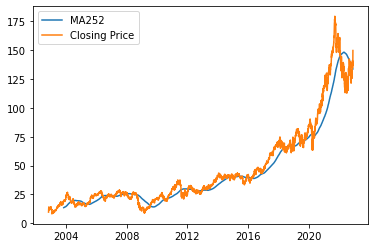

In [16]:
plt.plot(movingAverage.iloc[:,0], label = 'MA252')
plt.plot(df_close.iloc[:,0], label = 'Closing Price')
plt.legend()
plt.show()

In [41]:
## Exporting the Dataset


movingAverage.to_csv('C:/Users/Tejas/git/Portfolio-Optimization-using-Machine-Learning/Models/MovingAverage.csv')


# Linear Regression

### PCA

First, we perform PCA on our full features dataset to feed into our linear regression. 

In [42]:
#Dataset we are compressing, column level 0 = Stock, column level 1 = feature
raw_df = df.drop(columns = ['Unnamed: 0','Close']).set_index(['Date' , 'Index']).unstack(level = 1).stack(level = 0).unstack()
raw_df = raw_df.dropna(axis = 1)
raw_df.head()

Index               A                                                     AAP  \
             Adjusted       High        Low       Open      Volume   Adjusted   
Date                                                                            
2002-11-18   8.323743  10.071531   9.670959   9.799714   2996613.0  15.835198   
2002-11-19  10.159863  12.210300  10.515021  10.550787  18513155.0  16.001404   
2002-11-20  10.410803  12.303290  11.452074  11.866953   6616874.0  16.107180   
2002-11-21  11.163611  13.261803  12.439199  12.446352   7871020.0  16.451679   
2002-11-22  11.169734  13.412017  12.875536  13.054363   4724960.0  16.258270   

Index                                                   ...        STZ  \
                 High        Low       Open     Volume  ...   Adjusted   
Date                                                    ...              
2002-11-18  18.153334  17.233334  18.133333  2168400.0  ...  10.927383   
2002-11-19  17.993334  17.150000  17.469999  2984100.0  ...  10.746387   
2002-11-20  17.923332  17.333332  17.650000  3022200.0  ...  10.814262   
2002-11-21  18.299999  17.833332  17.833332  1959300.0  ...  10.882133   
2002-11-22  18.200001  17.549999  18.139999  2559000.0  ...  11.008828   

Index                                                 T                        \
              High     Low    Open     Volume  Adjusted       High        Low   
Date                                                                            
2002-11-18  12.420  12.000  12.415   395400.0  4.537619  19.667673  18.882175   
2002-11-19  11.950  11.625  11.900  1365200.0  4.509303  19.410875  18.935045   
2002-11-20  12.085  11.800  11.880   790600.0  4.636724  20.279455  19.040785   
2002-11-21  12.050  11.850  11.980  1055800.0  4.863253  21.095165  19.728098   
2002-11-22  12.165  11.900  11.995  1304800.0  4.875641  21.283989  20.475830   

Index                              
                 Open      Volume  
Date                               
2002-11-18  19.214502  10821052.0  
2002-11-19  19.335346   8903238.0  
2002-11-20  19.123867  12969639.0  
2002-11-21  19.788521  14758231.0  
2002-11-22  20.762840  10615435.0  

[5 rows x 500 columns]

In [43]:
raw_df = raw_df.to_numpy()
raw_df.shape

(5032, 500)

How many principal components to keep?

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Scaling the data
raw_df_scaled = MinMaxScaler().fit_transform(raw_df)

#Performing PCA ~ Reducing Dimensionality
PCA = PCA(n_components=382)
PCA_df = PCA.fit_transform(raw_df_scaled)

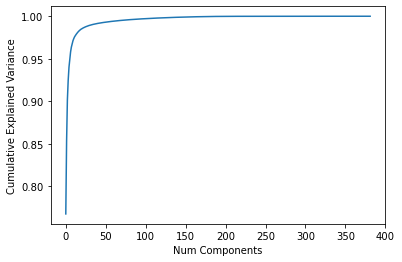

In [45]:
plt.plot(np.cumsum(PCA.explained_variance_ratio_))
plt.xlabel('Num Components')
plt.ylabel('Cumulative Explained Variance');

Storing the stock names, and dates

In [46]:
dates = df_close.index
stocks = df_close.columns
PC_labs = []
for i in range(PCA_df.shape[1]):
  lab = "PC" + str(i+1)
  PC_labs.append(lab)

### Linear Regression Prediction Functions

In [47]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

#Using the full features dataset, the closing prices; we are able to fit a line over a specified time period
def predict_prices(raw_df, close, time, lookback, forward, stock_num):
  
  #PCA
  pca1 = PCA(n_components = 10)
  pca2 = PCA(n_components = 10)


  #Training data = t - forward - lookback
  X_train = raw_df[time-forward-lookback:time-forward,:]
  X_train = MinMaxScaler().fit_transform(X_train)
  X_train = pca1.fit_transform(X_train)
  y_train = close.iloc[time-forward+1:time+1,stock_num]

  #Testing = t - lookback
  X_test = raw_df[time-lookback:time,:]
  X_test = MinMaxScaler().fit_transform(X_test)
  X_test = pca2.fit_transform(X_test)
  y_test = close.iloc[time+1 : time+forward+1, stock_num]

  LR = LinearRegression()
  LR.fit(X_train, y_train)
  predicted = LR.predict(X_test)
  # print(mean_squared_error(y_test,predicted))

  return predicted, y_test

In [48]:
#This function creates the entire table of features
def construct_prediction_tab(full_features_df,closing_prices_df):
  predictions = []
  actuals = [] 
  
  for stocks in range(closing_prices_df.shape[1]):
    stock_predictions = []
    stock_actuals = []
    
    for dates in range(60, df_close.shape[0], 30): 
      pred, act = predict_prices(full_features_df, closing_prices_df, dates, 30, 30, stocks)
      stock_predictions.append(pred)
      stock_actuals.append(act)

    import numpy as np
    stock_predictions = np.concatenate(stock_predictions)
    stock_actuals = np.concatenate(stock_actuals)

    predictions.append(stock_predictions)
    actuals.append(stock_actuals)

  return predictions, actuals

### Making Predictions

In [49]:
pred, act = construct_prediction_tab(raw_df, df_close)

### Creating Dataframe for Predictions and Actuals

In [50]:
# Need to get rid of 60 days for initial prediction window
final_actuals = pd.DataFrame(data = act, index=stocks, columns = dates[61:]).transpose()
final_preds = pd.DataFrame(data = pred, index = stocks).transpose() #Trimming because it predicts extra dates into future

In [56]:
final_preds = final_preds.iloc[:4966,:]
final_preds.index = dates[66:]

In [57]:
final_actuals.head()

Index,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,ED,GLW,KMX,KO,LNT,MMM,MO,SCHW,STZ,T
Date,,,,,,,,,,,,,,,,,,,,,
2003-02-18,9.084406,13.460000,0.272679,13.5725,4.05,16.429771,16.00,14.180,27.760000,11.73,...,39.240002,5.25,7.55,20.549999,7.900,63.305000,37.980000,8.32,12.425,17.892750
2003-02-19,8.962804,13.146667,0.265179,13.5925,4.10,16.070652,16.00,14.130,27.299999,11.29,...,38.840000,5.21,7.29,20.334999,7.870,62.935001,37.490002,8.18,12.325,17.394260
2003-02-20,9.012876,12.966667,0.263750,13.7500,4.00,15.801311,15.60,14.180,27.900000,11.07,...,38.770000,5.14,7.06,20.025000,7.935,62.424999,37.020000,8.01,12.350,16.087612
2003-02-21,9.620887,12.953333,0.267857,13.9525,3.85,15.747443,15.65,14.555,28.260000,11.14,...,39.310001,4.99,7.00,20.320000,8.035,63.424999,37.630001,8.07,12.335,15.657100
2003-02-24,9.291845,12.683333,0.263214,13.7300,3.74,15.433212,15.17,14.180,27.860001,10.83,...,39.209999,4.89,6.76,19.910000,7.940,62.509998,37.250000,7.68,12.130,15.672205


In [58]:
final_preds.head()

Index,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,ED,GLW,KMX,KO,LNT,MMM,MO,SCHW,STZ,T
Date,,,,,,,,,,,,,,,,,,,,,
2003-02-25,15.506763,16.105830,0.262772,14.481699,5.074987,18.150427,19.015167,13.744600,27.065459,12.575268,...,44.335837,3.385231,8.606876,22.059125,8.758636,63.723229,39.436588,11.456874,12.482210,21.323889
2003-02-26,15.549788,15.911950,0.261953,14.448916,4.432463,18.041174,18.945761,13.697497,26.963302,12.665103,...,44.943087,3.444374,8.969668,22.597484,8.868813,63.825202,40.677021,12.225731,12.389313,22.663645
2003-02-27,14.939209,16.103603,0.261630,14.079474,4.018885,18.054103,18.359253,13.188757,26.839892,12.693591,...,44.823077,3.502409,9.067353,22.940584,8.752771,63.809111,41.270465,12.400880,12.115752,22.072284
2003-02-28,14.409235,15.711434,0.260283,14.162644,4.006619,18.008941,18.257754,13.342342,26.804870,12.676390,...,44.542914,3.711538,9.118298,22.843829,8.822678,63.821572,41.372994,12.532644,12.132834,22.542185
2003-03-03,13.754361,15.328389,0.260197,14.357890,4.406569,17.956305,18.249658,13.609949,26.789232,12.568144,...,43.813972,3.902458,8.868447,22.257015,8.810047,63.666656,40.433579,12.093666,12.186339,22.199578


### Exporting the Predictions

In [60]:


final_actuals.to_csv('C:/Users/Tejas/git/Portfolio-Optimization-using-Machine-Learning/Models/LR_Actual_Prices.csv')


final_preds.to_csv('C:/Users/Tejas/git/Portfolio-Optimization-using-Machine-Learning/Models/LR_Predicted_Prices.csv')


# Diagnostics

In [61]:
# Three different Prediction Windows
p1 , t1 = predict_prices(raw_df, df_close, 60, 30, 30, 5)
p2 , t2 = predict_prices(raw_df, df_close, 90, 30, 30, 5)
p3 , t3 = predict_prices(raw_df, df_close, 120, 30, 30, 5)

In [62]:
predictions = np.concatenate([p1,p2,p3])
actuals = np.concatenate((t1,t2))

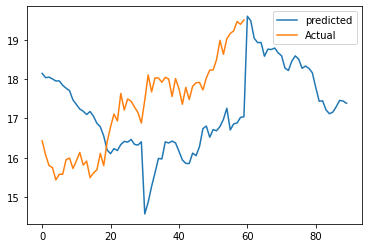

In [63]:
#This is a plt for the first 90 days of predictions for the first stock
plt.plot(predictions, label = 'predicted')
plt.plot(actuals, label = 'Actual')
plt.legend()
plt.show()

In [64]:
stock_predictions = []
stock_actuals = []

for i in range(60,df_close.shape[0], 30):
  pred, act = predict_prices(raw_df, df_close, i, 30, 30, 5)
  stock_predictions.append(pred)
  stock_actuals.append(act)

In [65]:
stock_predictions = np.concatenate(stock_predictions)
stock_actuals = np.concatenate(stock_actuals)

ValueError: x and y must be the same size

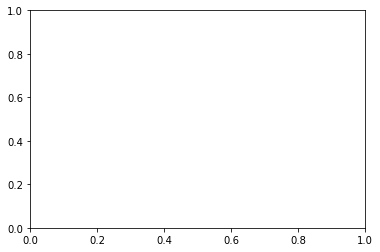

In [71]:
# Q-Q plot for predictions vs actuals
plt.scatter(x = stock_predictions[:4966], y = stock_actuals)
print(x)

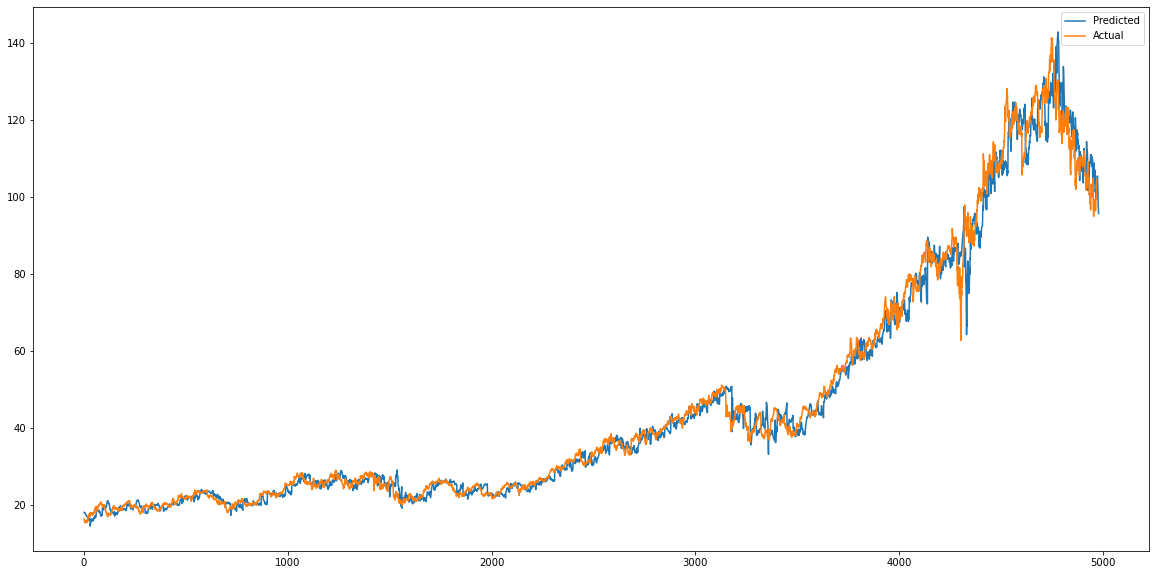

In [72]:
#Full Prediction vs Actuals for the same stock
plt.figure(figsize=(20,10))
plt.plot(stock_predictions, label = 'Predicted')
plt.plot(stock_actuals, label = 'Actual')
plt.legend()

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(final_actuals[:4966], final_preds)

5.71298459890687